# Exploratory Data Analysis(EDA)

In [190]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Variable Name	Description

* Survived:	Survived (1) or died (0)

* Pclass:	Passenger’s class

* Name:	Passenger’s name

* Sex:	Passenger’s sex

* Age:	Passenger’s age

* SibSp:	Number of siblings/spouses aboard

* Parch	:Number of parents/children aboard

* Ticket:	Ticket number

* Fare:	Fare

* Cabin:	Cabin

* Embarked:	Port of embarkation

# Attached are two files test.csv and survival.csv

In [191]:
train1 = pd.read_csv("Titanic_survival.csv")
train2 = pd.read_csv("Titanic_test.csv")
train1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [192]:
print(train1.columns)
print(train2.columns)

Index(['PassengerId', 'Survived'], dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [193]:
Titanic = pd.merge(train1,train2, how="inner")
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [194]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


# FINDING NULL VALUES

In [195]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The Age, Cabin and Fare have null values. I will try to fix them.

# Filling NaN Ages

In [196]:
Titanic['Initial']=0
for i in Titanic:
    Titanic['Initial']=Titanic.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [197]:
pd.crosstab(Titanic.Initial,Titanic.Sex) #Checking the I

Sex,female,male
Initial,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [198]:
Titanic['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [199]:
Titanic.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Dona      39.000000
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64

In [200]:
## Assigning the NaN Values with the Ceil values of the mean ages
Titanic.loc[(Titanic.Age.isnull())&(Titanic.Initial=='Mr'),'Age']=33
Titanic.loc[(Titanic.Age.isnull())&(Titanic.Initial=='Mrs'),'Age']=36
Titanic.loc[(Titanic.Age.isnull())&(Titanic.Initial=='Master'),'Age']=5
Titanic.loc[(Titanic.Age.isnull())&(Titanic.Initial=='Miss'),'Age']=22
Titanic.loc[(Titanic.Age.isnull())&(Titanic.Initial=='Other'),'Age']=46

In [201]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Initial          0
dtype: int64

In [202]:
Titanic.Age.isnull().any() #So no null values left finally 

False

In [203]:
Titanic['Fare'].fillna('S',inplace=True)

In [204]:
Titanic.Fare.isnull().any()# Finally No NaN values

False

In [205]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Initial          0
dtype: int64

#### Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

In [206]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.242823,0.447368,0.392344
std,120.810458,0.481622,0.841838,13.039264,0.896760,0.981429
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000
50%,1100.500000,0.000000,3.000000,30.000000,0.000000,0.000000
75%,1204.750000,1.000000,3.000000,36.000000,1.000000,0.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000


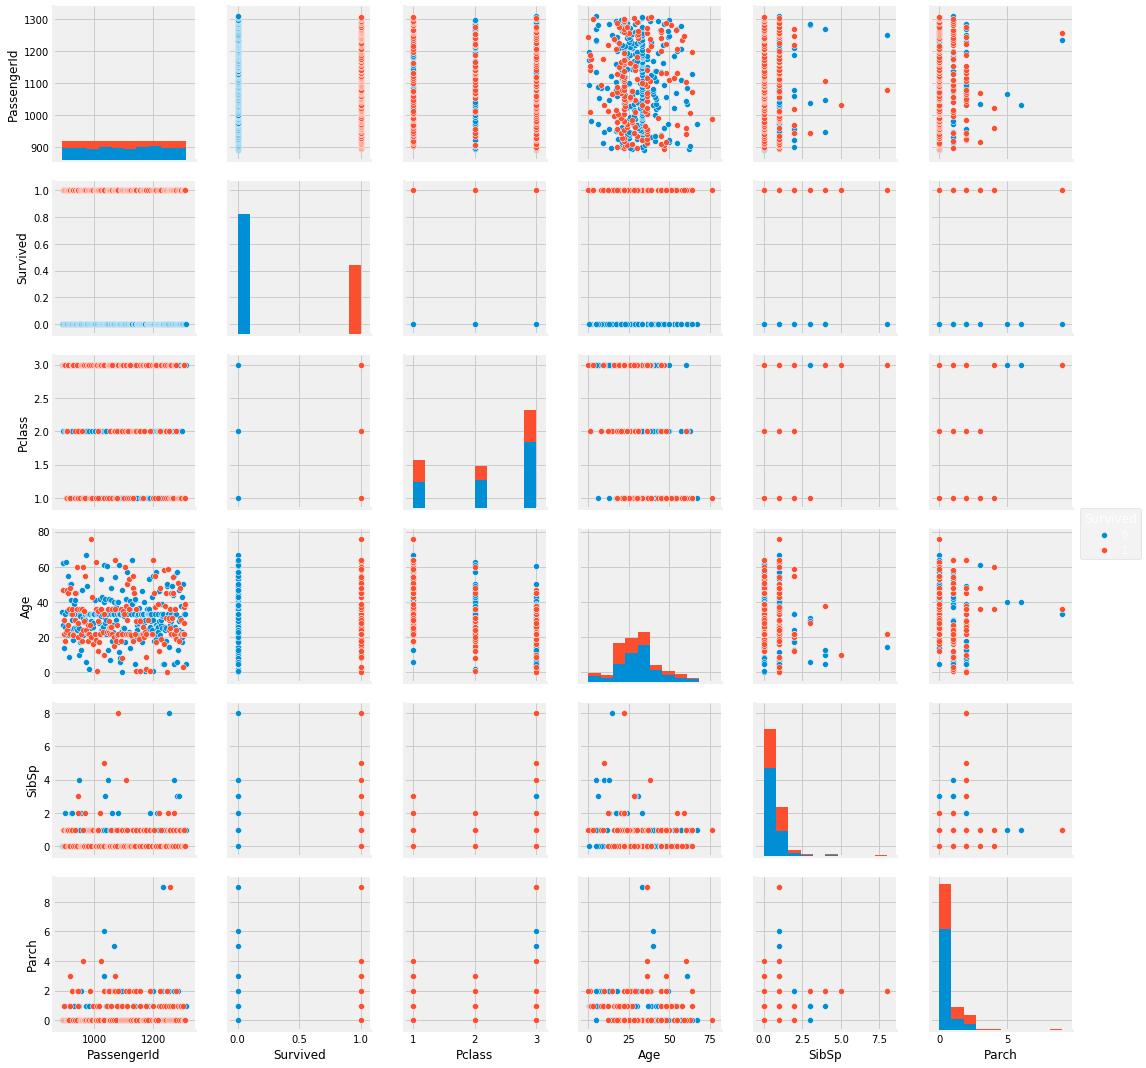

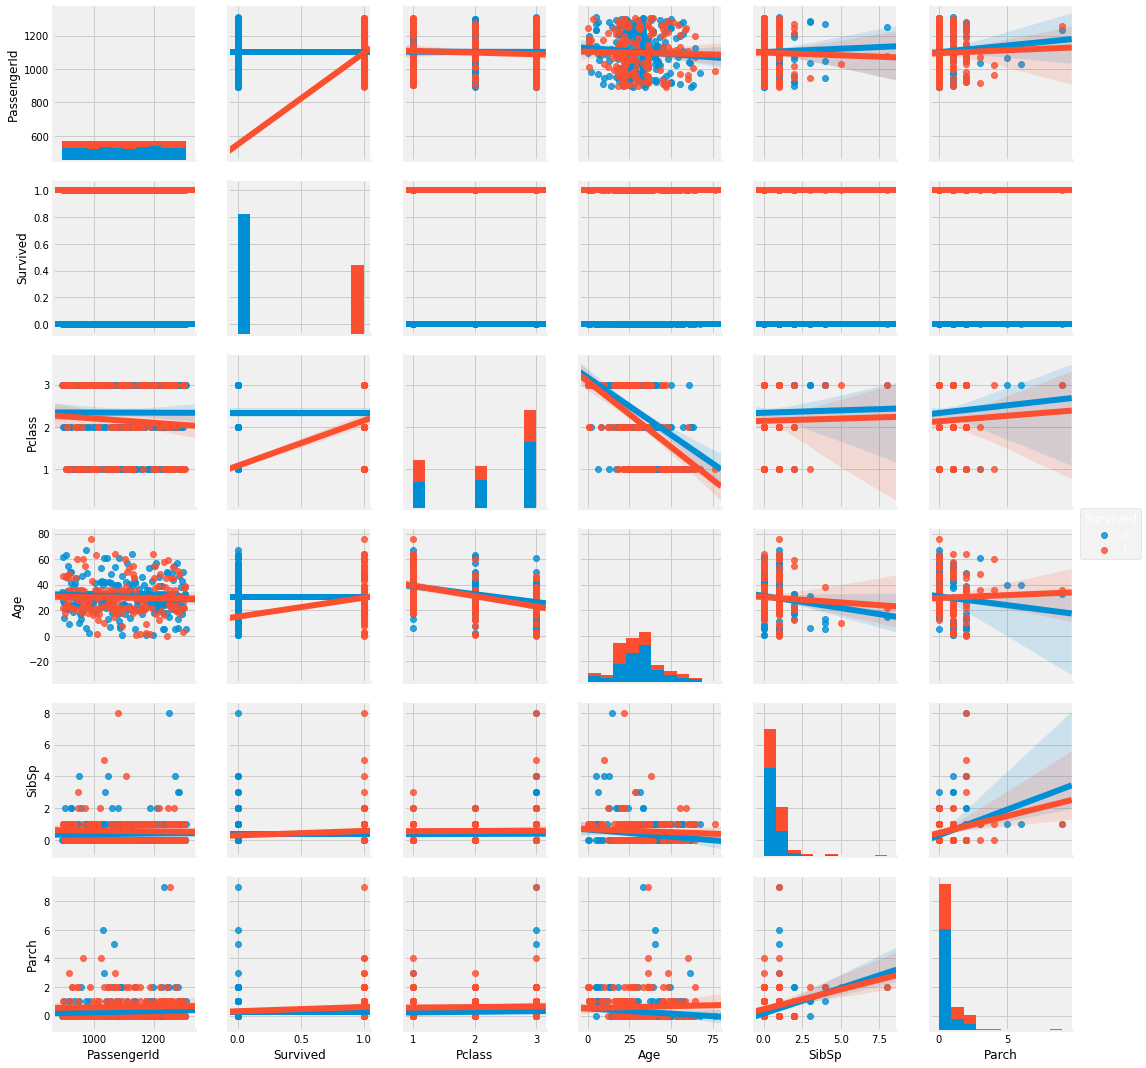

In [207]:

# without regression
sns.pairplot(Titanic, kind="scatter", hue="Survived")
plt.show()

# with regression
sns.pairplot(Titanic, kind="reg", hue="Survived")
plt.show()


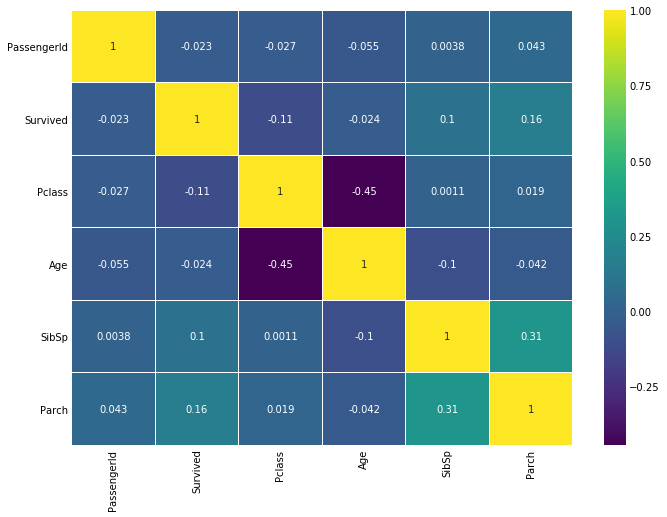

In [208]:
sns.heatmap(Titanic.corr(),annot=True,cmap='viridis',linewidths=0.2) #Titanic.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# a/ The survival rate - 5 marks



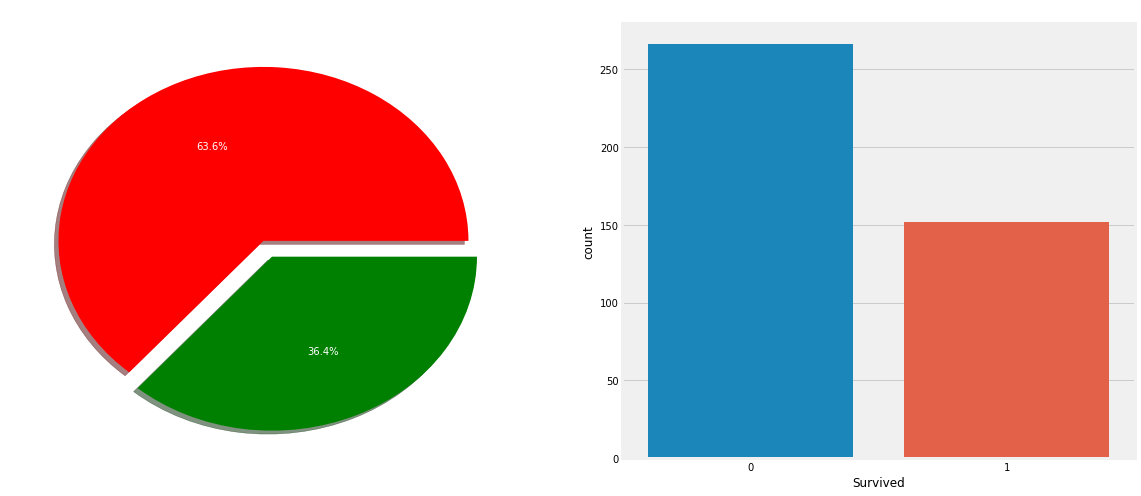

In [209]:

f,ax=plt.subplots(1,2,figsize=(18,8))
Titanic['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['red','green'])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=Titanic,ax=ax[1])
ax[1].set_title('Survived')
plt.show()


# It is evident that not many passengers survived the accident.

Out of 418 passengers in training set, i.e Only 36.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

# Chances for Survival by AGE

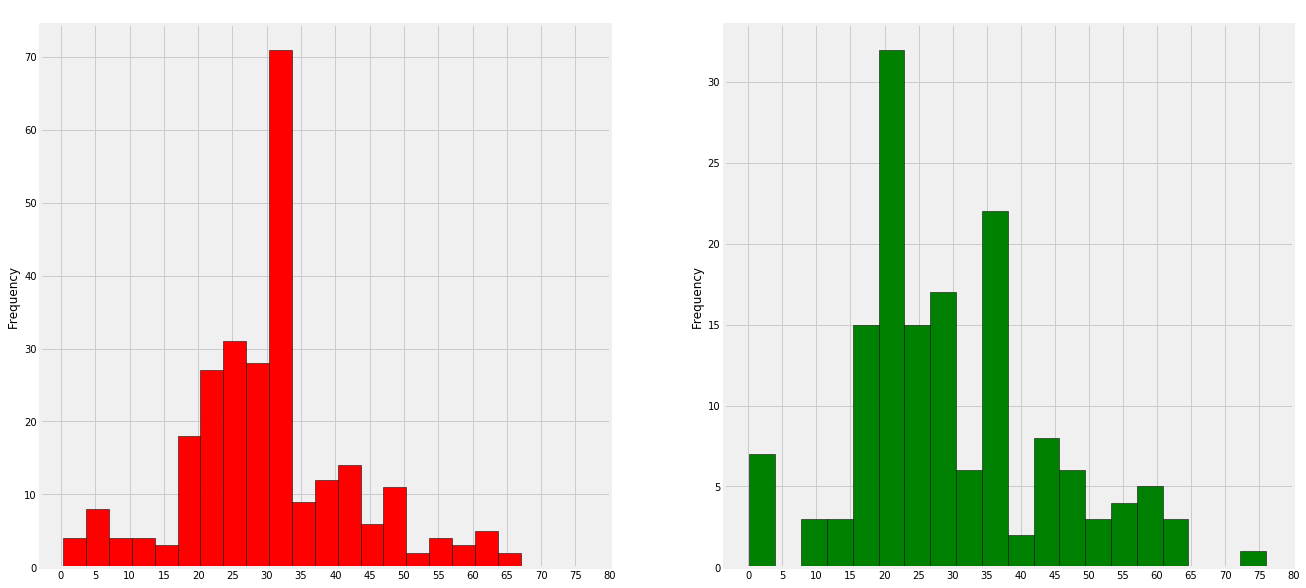

In [210]:
f,ax=plt.subplots(1,2,figsize=(20,10))
Titanic[Titanic['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
Titanic[Titanic['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# Observations:
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(75 years).

3)Maximum number of deaths were in the age group of 30-40.

In [211]:
Titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

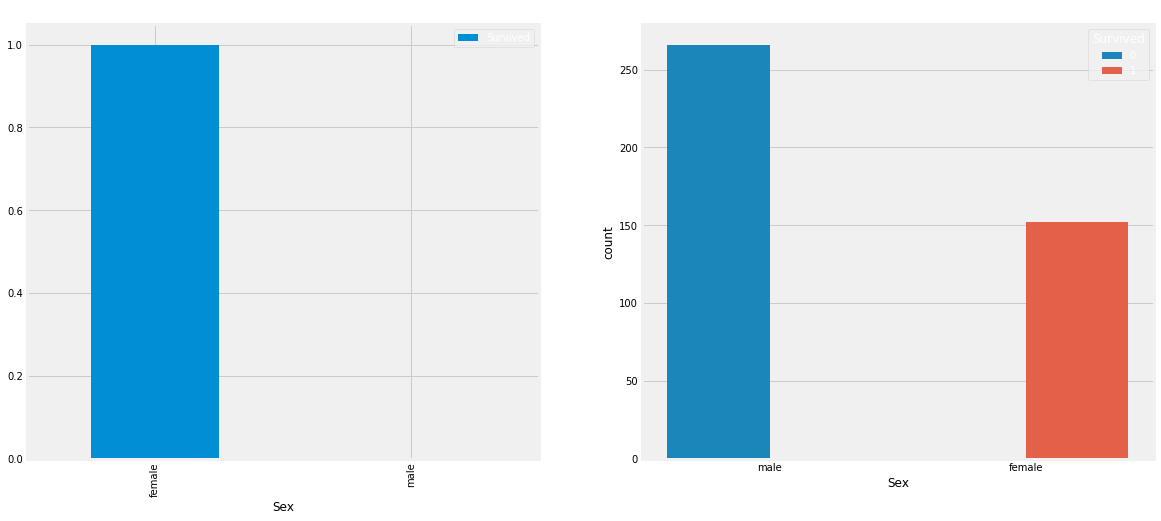

In [212]:
f,ax=plt.subplots(1,2,figsize=(18,8))
Titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=Titanic,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 100% while that for men in around 0%.

This looks to be a very important feature for modeling. But is it the best?? Lets check other features.

In [213]:
pd.crosstab(Titanic.Pclass,Titanic.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,57,50,107
2,63,30,93
3,146,72,218
All,266,152,418


# b/ what kind of passengers did not survive – 10 marks

# Pclass

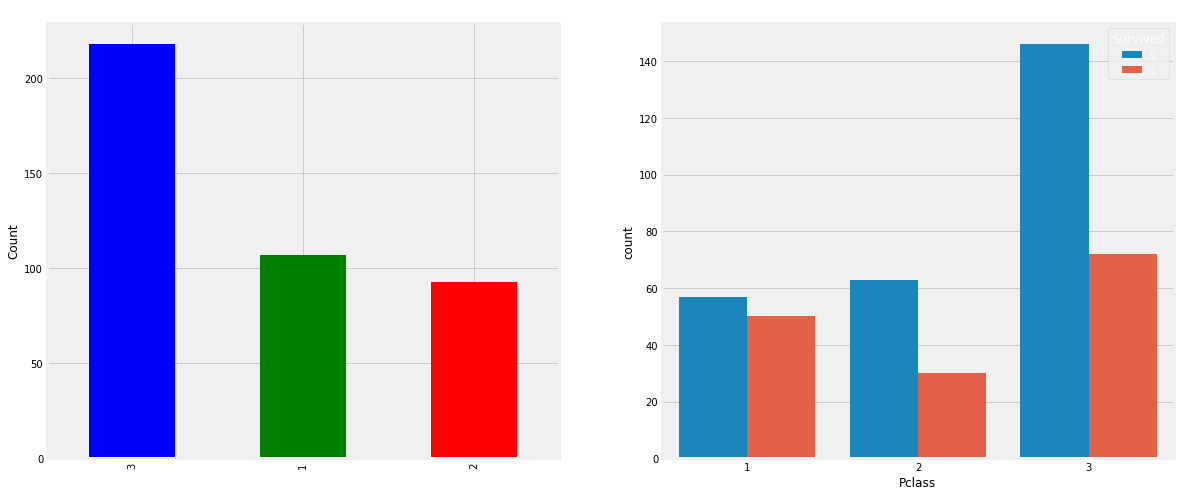

In [214]:
f,ax=plt.subplots(1,2,figsize=(18,8))
Titanic['Pclass'].value_counts().plot.bar(color=['blue','green','red'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=Titanic,ax=ax[1])
ax[1].set_title('Pclass:Survived vs not survive')
plt.show()

But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together.

In [215]:
pd.crosstab([Titanic.Sex,Titanic.Survived],Titanic.Pclass,margins=True)

,Pclass,1,2,3,All
Sex,Survived,,,,
female,1,50,30,72,152
male,0,57,63,146,266
All,,107,93,218,418


It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

# c/ Show us EDA that can best explain the fate of the passenger and show us which of the variables are significant in explaining this - 25 marks

# Age

In [216]:
print('Oldest Passenger was of:',Titanic['Age'].max(),'Years')
print('Youngest Passenger was of:',Titanic['Age'].min(),'Years')
print('Average Age on the ship:',Titanic['Age'].mean(),'Years')

Oldest Passenger was of: 76.0 Years
Youngest Passenger was of: 0.17 Years
Average Age on the ship: 30.242822966507177 Years


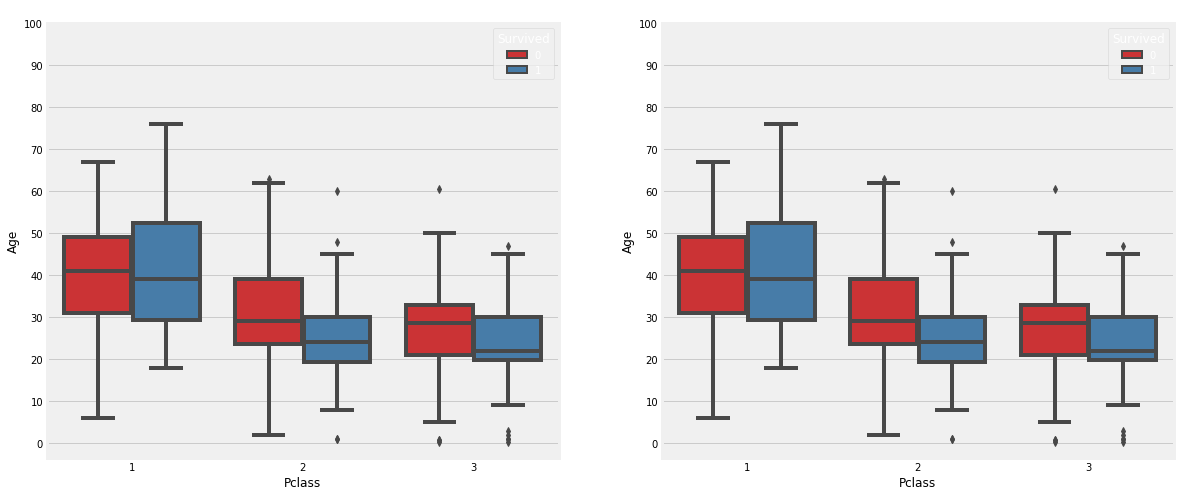

In [217]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x="Pclass", y="Age", hue="Survived", data=Titanic,ax=ax[0],palette="Set1")
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.boxplot(x="Pclass", y="Age", hue="Survived", data=Titanic,ax=ax[1],palette="Set1")
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# Observations:
1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 86 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

### Chances for Survival by Port Of Embarkation

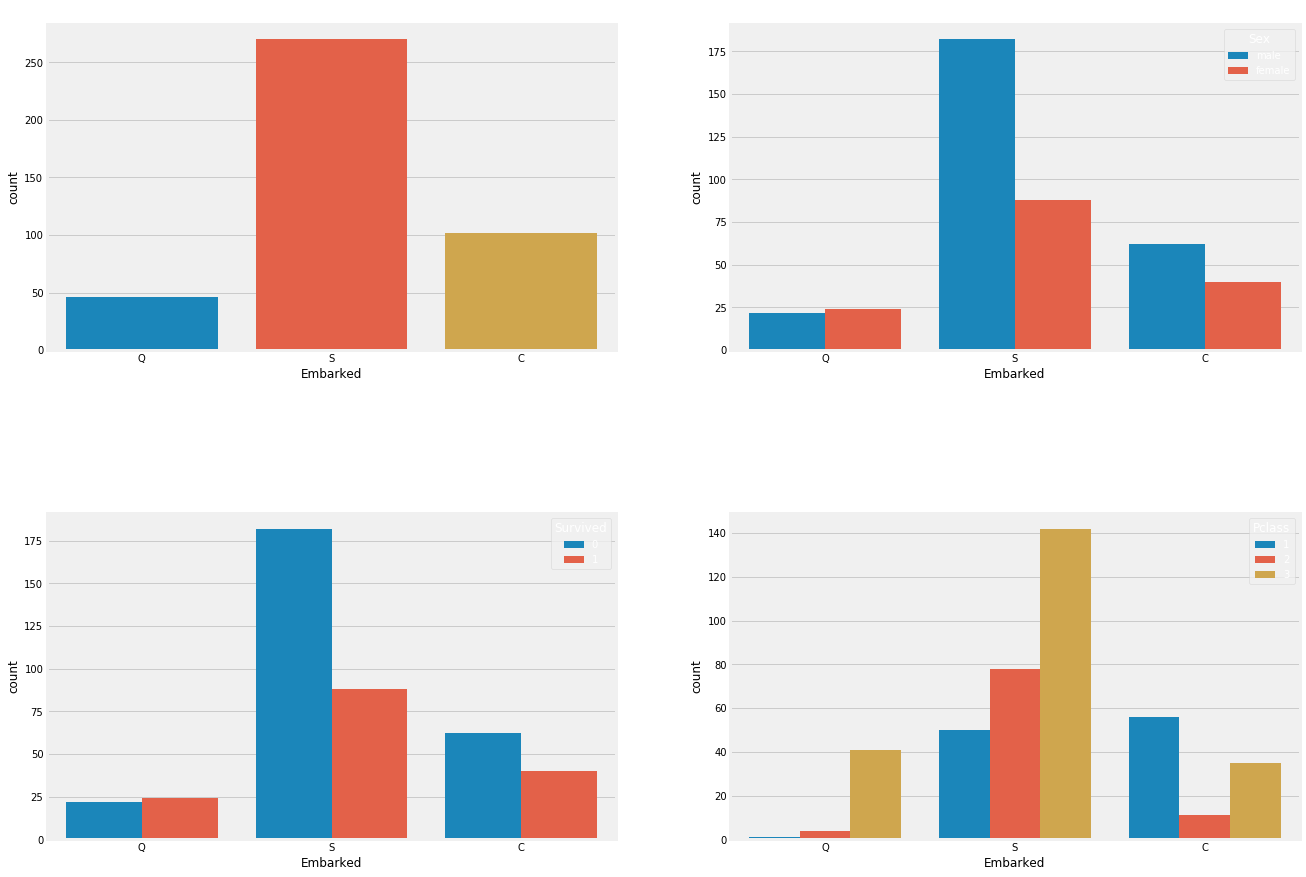

In [218]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=Titanic,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=Titanic,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=Titanic,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=Titanic,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Observations:
1)Maximum passenegers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4)Port Q had almost 95% of the passengers were from Pclass3.

### SibSip

This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [219]:
pd.crosstab([Titanic.SibSp],Titanic.Survived)

Survived,0,1
SibSp,,
0,195,88
1,56,54
2,8,6
3,3,1
4,3,1
5,0,1
8,1,1


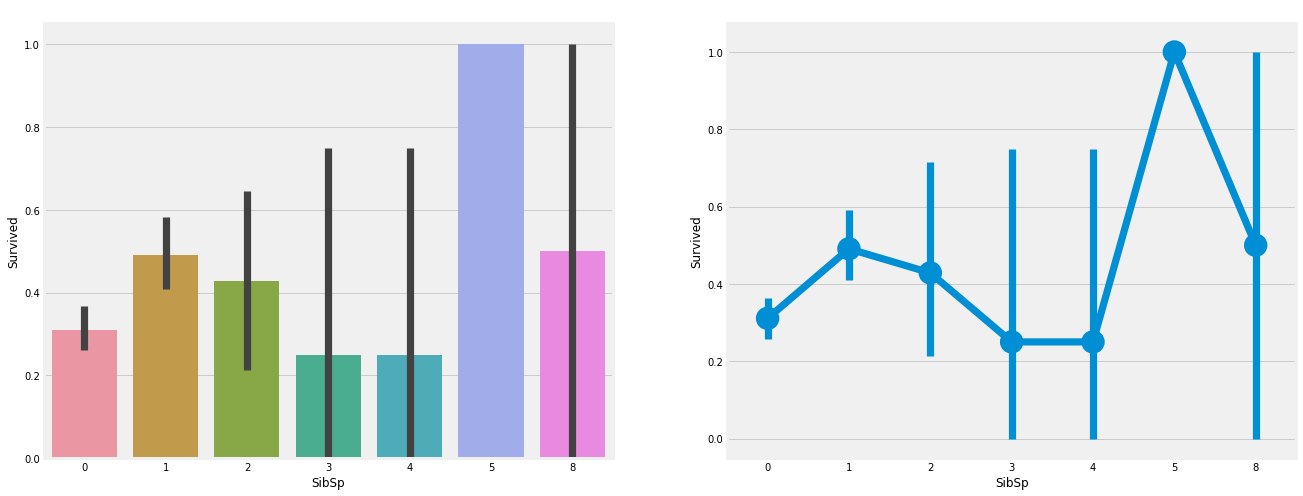

In [220]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=Titanic,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=Titanic,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [221]:
pd.crosstab(Titanic.SibSp,Titanic.Pclass)

Pclass,1,2,3
SibSp,,,
0,61,62,160
1,42,27,41
2,3,4,7
3,1,0,3
4,0,0,4
5,0,0,1
8,0,0,2


# Observations:
The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

# Parch

In [222]:
pd.crosstab(Titanic.Parch,Titanic.Pclass)

Pclass,1,2,3
Parch,,,
0,79,72,173
1,19,11,22
2,6,9,18
3,2,1,0
4,1,0,1
5,0,0,1
6,0,0,1
9,0,0,2


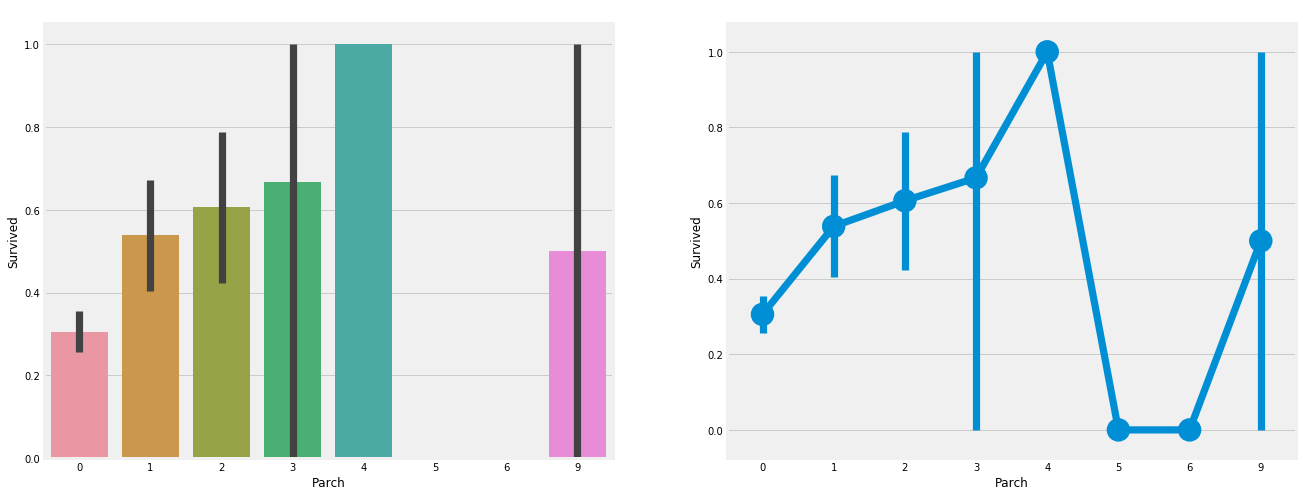

In [223]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=Titanic,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=Titanic,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

# Observations:
Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

# Observations in all features:
Sex: The chance of survival for women is high as compared to men.

Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.